# NAMA : FILIPUS ADRIEL MANIK
# NIM : 2109106096
# KELAS : B1'21

## LINK DATASET : [Ras Kucing](https://www.kaggle.com/datasets/shawngano/gano-cat-breed-image-collection/)

## Import liblary

In [107]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpig
import splitfolders as sf
from keras.preprocessing.image import ImageDataGenerator
import os

## Split dataset

In [108]:
sf.ratio('Gano-Cat-Breeds-V1_1', output="Kucing_Splitted", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 0 files [00:00, ? files/s]

Copying files: 750 files [00:01, 695.64 files/s]


## Augmentasi Gambar (Batch)

In [109]:
image_datagen = ImageDataGenerator(
    rescale = 1./255.0,
    fill_mode = 'nearest',
    validation_split = 0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2
)

## Membuat Train dan val Dir

In [110]:
## Jika tidak memiliki folder validation
TRAIN_DIR = './Kucing_Splitted/train/'
train_generator = image_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(64,64),
    batch_size = 16,
    shuffle=True,
    class_mode = 'binary',
    subset = 'training'
)

VAL_DIR = './Kucing_Splitted/val/'
val_generator = image_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(64,64),
    batch_size = 16,
    shuffle=True,
    class_mode = 'binary',
    subset = 'validation'
)

Found 480 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


## Membuat Model 

In [111]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, 3, activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [112]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## Training dataset

In [113]:
from tensorflow.keras.callbacks import EarlyStopping

earlyStop = EarlyStopping(
    patience=50,
    monitor="val_accuracy",
    restore_best_weights=True
)

hasil = model.fit(
    train_generator, 
    validation_data=val_generator, 
    epochs=75, 
    verbose=1,
    callbacks=[earlyStop]
)

Epoch 1/75
30/30 [==============================] - 8s 228ms/step - loss: 0.7003 - accuracy: 0.5208 - val_loss: 0.6994 - val_accuracy: 0.5000
Epoch 2/75
30/30 [==============================] - 5s 163ms/step - loss: 0.6963 - accuracy: 0.5000 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 3/75
30/30 [==============================] - 5s 158ms/step - loss: 0.6927 - accuracy: 0.4875 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 4/75
30/30 [==============================] - 5s 161ms/step - loss: 0.6914 - accuracy: 0.5250 - val_loss: 0.6879 - val_accuracy: 0.4286
Epoch 5/75
30/30 [==============================] - 5s 161ms/step - loss: 0.6930 - accuracy: 0.5000 - val_loss: 0.6798 - val_accuracy: 0.4286
Epoch 6/75
30/30 [==============================] - 5s 166ms/step - loss: 0.6824 - accuracy: 0.5562 - val_loss: 0.6886 - val_accuracy: 0.4286
Epoch 7/75
30/30 [==============================] - 5s 160ms/step - loss: 0.6820 - accuracy: 0.5750 - val_loss: 0.7057 - val_accuracy: 0.4286
Epoch 

## Testing

In [114]:
TEST_DIR = './Kucing_Splitted/test/'
test_generator = image_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(64,64),
    batch_size = 16,
    shuffle=True,
    class_mode = 'binary',
)

Found 76 images belonging to 2 classes.


## Evaluate Model

In [145]:
model.evaluate(test_generator)

5/5 [==============================] - 0s 64ms/step - loss: 0.9938 - accuracy: 0.6316


[0.9938008189201355, 0.6315789222717285]

## Prediksi Gambar

1/1 [==============================] - 0s 33ms/step


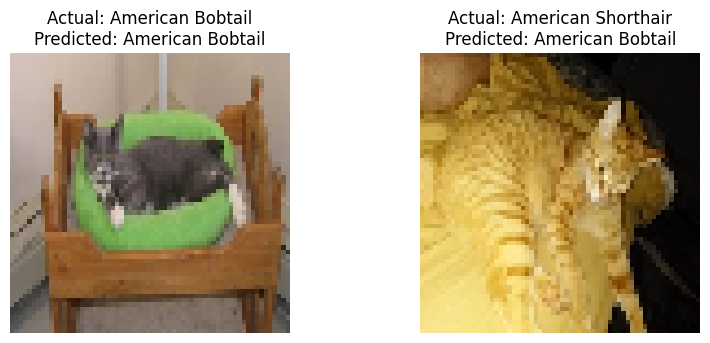

In [131]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

class_labels = sorted(os.listdir(TEST_DIR))

test_images = []

for class_label in class_labels:
    class_path = os.path.join(TEST_DIR, class_label)
    img_name = os.listdir(class_path)[0]
    img_path = os.path.join(class_path, img_name)
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    test_images.append(img_array)

test_images = np.vstack(test_images)

predictions = model.predict(test_images)

plt.figure(figsize=(15, 8))

for i in range(len(class_labels)):
    plt.subplot(2, 3, i + 1)

    img_path = os.path.join(TEST_DIR, class_labels[i], os.listdir(os.path.join(TEST_DIR, class_labels[i]))[0])
    img = image.load_img(img_path, target_size=(64, 64))
    plt.imshow(img)
    plt.title(f'Actual: {class_labels[i]}\nPredicted: {class_labels[np.argmax(predictions[i])]}')
    plt.axis('off')

plt.show()

## Show Graphic

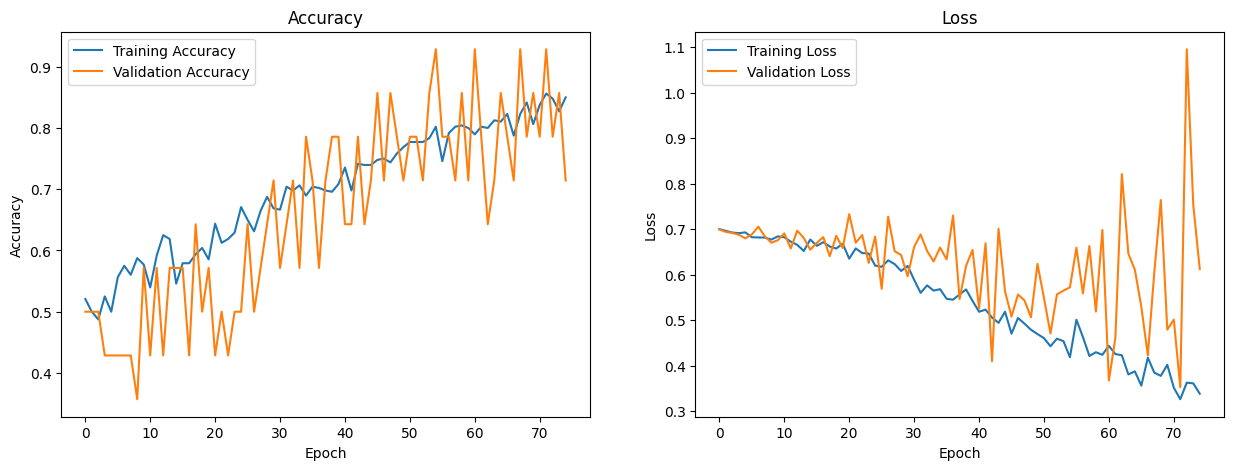

In [142]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(hasil.history['accuracy'], label='Training Accuracy')
plt.plot(hasil.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hasil.history['loss'], label='Training Loss')
plt.plot(hasil.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()